In [25]:
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
import pandas as pd
inpatient = pd.read_csv("inpatient_cleaned&transformed.csv")
outpatient = pd.read_csv("outpatient_cleaned&transformed.csv")
beneficiary = pd.read_csv("beneficiary_cleaned&Transformed.csv")
df_flag = pd.read_csv("../../Original/Train-1542865627584.csv")

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
inpatient.head()

,ClaimID,BeneID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_4280,Diagnosis_41401,Diagnosis_41400,Diagnosis_486,Diagnosis_2948,Diagnosis_71590,Diagnosis_5859,Diagnosis_3051,Diagnosis_2859,Diagnosis_25000,Diagnosis_27651,Diagnosis_5990,Diagnosis_311,Diagnosis_5849,Diagnosis_2449,Diagnosis_2768,Diagnosis_496,Diagnosis_2761,Diagnosis_42731,Diagnosis_40390,Diagnosis_49121,Diagnosis_4019,Diagnosis_2724,Diagnosis_53081,Diagnosis_2720,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY338562,PHY353156,PHY429938,PHY339670,PHY362864,PHY361948,PHY429828,PHY411541,PHY404394,PHY423877,PHY341560,PHY430367,PHY315112,PHY396496,PHY376882,PHY376288,PHY429430,PHY385561,PHY399458,PHY314410,PHY412508,PHY428454,PHY400274,PHY332294,PHY431177,PHY422134,sum_Physician
0,CLM46614,BENE11001,PRV55912,1.580334,0.0,0.495000,0.494369,1,0,0,-1.159907,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,-0.823387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
1,CLM66048,BENE11001,PRV55907,-0.428070,0.0,-0.805205,-0.805652,1,1,0,0.531912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.784958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
2,CLM68358,BENE11001,PRV56046,-0.428070,0.0,-0.340828,-0.341280,1,0,1,0.531912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
3,CLM38412,BENE11011,PRV52405,-0.428070,0.0,0.843234,0.842460,1,1,1,1.916048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.951322
4,CLM63689,BENE11014,PRV56614,0.282015,0.0,1.724239,1.722905,1,1,0,0.531912,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678


In [5]:
beneficiary.head()

,Unnamed: 0,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age
0,0,BENE11001,1,1,0,39,230,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,3.379773,2.932687,-1.052227,-0.412684,0,-0.638783
1,1,BENE11002,0,1,0,39,280,0.092163,0.109916,0,0,0,0,0,0,0,0,0,0,0,-0.382538,-0.418175,-1.221429,-0.571207,0,-0.164242
2,2,BENE11003,1,1,0,52,590,0.092163,0.109916,1,0,0,0,0,0,0,1,0,0,0,-0.382538,-0.418175,-0.932446,-0.670511,0,-0.164242
3,3,BENE11004,1,1,0,39,270,0.092163,0.109916,1,1,0,0,0,0,1,1,1,1,0,-0.382538,-0.418175,0.723785,1.064249,0,1.140607
4,4,BENE11005,1,1,0,24,680,0.092163,0.109916,0,0,0,0,1,0,1,0,0,0,0,-0.382538,-0.418175,0.714029,1.431893,0,-0.080281


In [6]:
beneficiary_outpatient = beneficiary.merge(outpatient, on="BeneID", how="inner")
beneficiary_outpatient_flagged = df_flag.merge(beneficiary_outpatient, on="Provider", how="inner")
beneficiary_outpatient_flagged = beneficiary_outpatient_flagged.drop(["Unnamed: 0","Provider","BeneID"], axis=1)
beneficiary_outpatient_flagged = beneficiary_outpatient_flagged.set_index("ClaimID")

In [7]:
beneficiary_outpatient_flagged

,PotentialFraud,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age,InscClaimAmtReimbursed,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,other_ClmDiagnosisCode_sum,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,all_ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM733300,No,1,1,1,1,660,0.092163,0.109916,1,1,1,1,0,0,1,1,0,0,0,-0.382538,-0.418175,-0.460385,-0.182325,0,0.453132,-0.880359,-0.376620,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.550047,1,1,0,0,0,0,0,0,0,0,-0.039876
CLM372475,No,1,1,0,1,440,0.092163,0.109916,1,0,0,0,0,0,1,1,1,0,1,-0.382538,-0.418175,0.027201,-1.190081,0,-0.638783,1.336100,2.438614,1,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.362686,1,1,1,1,1,1,0,0,0,0,1.515736
CLM748221,No,0,1,0,1,660,0.092163,0.109916,0,0,1,0,0,0,1,1,0,1,0,-0.382538,-0.418175,0.495793,0.545629,0,0.091859,1.506492,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM272936,No,1,1,0,1,410,0.092163,0.109916,1,1,1,1,1,1,1,1,0,0,0,-0.171430,0.698779,2.172314,2.167944,0,-0.080281,1.110638,2.438614,1,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.701433,1,1,1,1,1,1,0,0,0,0,1.515736
CLM452024,No,1,1,0,1,510,0.092163,0.109916,1,1,0,0,0,0,0,1,1,0,0,0.140005,0.698779,-0.356432,-0.412684,0,1.565478,-0.144456,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM582682,No,0,0,0,21,210,0.092163,0.109916,1,0,0,0,0,1,1,1,1,1,0,-0.382538,-0.418175,0.709123,0.449339,0,-0.407748,1.643772,2.706854,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.701433,1,1,1,1,1,0,0,0,0,0,1.263648
CLM553988,No,1,0,0,21,210,0.092163,0.109916,0,0,0,0,0,0,0,0,0,0,0,-0.382538,-0.418175,-0.641483,0.155291,0,-1.665984,0.512193,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.341742,1,1,0,0,0,0,0,0,0,0,-0.039876
CLM610854,No,0,1,1,21,210,0.092163,0.109916,0,0,1,1,1,0,1,1,0,0,0,2.559380,1.815733,0.803970,0.754001,0,-1.918475,-0.062759,-0.376620,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.341742,1,1,1,0,0,0,0,0,0,0,0.536984


In [8]:
beneficiary_outpatient_flagged["PotentialFraud"].to_csv("outpatient_claimID_flagged.csv")

In [9]:
beneficiary_inpatient = beneficiary.merge(inpatient, on="BeneID", how="inner")
beneficiary_inpatient_flagged = df_flag.merge(beneficiary_inpatient, on="Provider", how="inner")
beneficiary_inpatient_flagged = beneficiary_inpatient_flagged.drop(["Unnamed: 0","Provider","BeneID"], axis=1)
beneficiary_inpatient_flagged = beneficiary_inpatient_flagged.set_index("ClaimID")

In [10]:
beneficiary_inpatient_flagged["PotentialFraud"].to_csv("inpatient_claimID_flagged.csv")

In [11]:
beneficiary_inpatient
beneficiary_inpatient_1 = beneficiary_inpatient.drop(["Unnamed: 0","Provider","BeneID","State","County"], axis=1)

In [12]:
beneficiary_inpatient_1.set_index("ClaimID",inplace=True)
beneficiary_inpatient_1

,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_4280,Diagnosis_41401,Diagnosis_41400,Diagnosis_486,Diagnosis_2948,Diagnosis_71590,Diagnosis_5859,Diagnosis_3051,Diagnosis_2859,Diagnosis_25000,Diagnosis_27651,Diagnosis_5990,Diagnosis_311,Diagnosis_5849,Diagnosis_2449,Diagnosis_2768,Diagnosis_496,Diagnosis_2761,Diagnosis_42731,Diagnosis_40390,Diagnosis_49121,Diagnosis_4019,Diagnosis_2724,Diagnosis_53081,Diagnosis_2720,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY338562,PHY353156,PHY429938,PHY339670,PHY362864,PHY361948,PHY429828,PHY411541,PHY404394,PHY423877,PHY341560,PHY430367,PHY315112,PHY396496,PHY376882,PHY376288,PHY429430,PHY385561,PHY399458,PHY314410,PHY412508,PHY428454,PHY400274,PHY332294,PHY431177,PHY422134,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,3.379773,2.932687,-1.052227,-0.412684,0,-0.638783,1.580334,0.0,0.495000,0.494369,1,0,0,-1.159907,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,-0.823387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
CLM66048,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,3.379773,2.932687,-1.052227,-0.412684,0,-0.638783,-0.428070,0.0,-0.805205,-0.805652,1,1,0,0.531912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.784958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM68358,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,3.379773,2.932687,-1.052227,-0.412684,0,-0.638783,-0.428070,0.0,-0.340828,-0.341280,1,0,1,0.531912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM38412,0,0,0,0.092163,0.109916,0,1,1,0,0,1,1,0,0,1,1,0.140005,0.698779,-0.544920,0.449339,0,2.129803,-0.428070,0.0,0.843234,0.842460,1,1,1,1.916048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.951322
CLM63689,0,1,1,0.092163,0.109916,0,1,1,0,1,1,0,1,0,0,0,1.839316,1.815733,-0.836680,-0.232619,0,-0.246804,0.282015,0.0,1.724239,1.722905,1,1,0,0.531912,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM69886,0,0,0,0.092163,0.109916,0,0,0,

In [13]:
beneficiary_inpatient_flagged.to_csv("beneficiary_inpatient_flagged.csv")
beneficiary_outpatient_flagged.to_csv("beneficiary_outpatient_flagged.csv")

In [14]:
beneficiary_inpatient_1.dtypes

Gender                               int64
Race                                 int64
RenalDiseaseIndicator                int64
NoOfMonths_PartACov                float64
NoOfMonths_PartBCov                float64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt           float64
IPAnnualDeductibleAmt              float64
OPAnnualReimbursementAmt           float64
OPAnnualDeductibleAmt              float64
is_dead                              int64
Age                                float64
InscClaimAmtReimbursed             float64
DeductibleA

In [15]:
beneficiary_inpatient_1.isnull().sum()

Gender                               0
Race                                 0
RenalDiseaseIndicator                0
NoOfMonths_PartACov                  0
NoOfMonths_PartBCov                  0
ChronicCond_Alzheimer                0
ChronicCond_Heartfailure             0
ChronicCond_KidneyDisease            0
ChronicCond_Cancer                   0
ChronicCond_ObstrPulmonary           0
ChronicCond_Depression               0
ChronicCond_Diabetes                 0
ChronicCond_IschemicHeart            0
ChronicCond_Osteoporasis             0
ChronicCond_rheumatoidarthritis      0
ChronicCond_stroke                   0
IPAnnualReimbursementAmt             0
IPAnnualDeductibleAmt                0
OPAnnualReimbursementAmt             0
OPAnnualDeductibleAmt                0
is_dead                              0
Age                                  0
InscClaimAmtReimbursed               0
DeductibleAmtPaid                  899
claim_duration                       0
hospitalisation_duration 

In [16]:
beneficiary_inpatient_1.drop(["DeductibleAmtPaid","IPAnnualReimbursementAmt", "IPAnnualDeductibleAmt"], axis = 1, inplace = True)

# = beneficiary_inpatient_1["DeductibleAmtPaid"].fillna(0)

<AxesSubplot:>

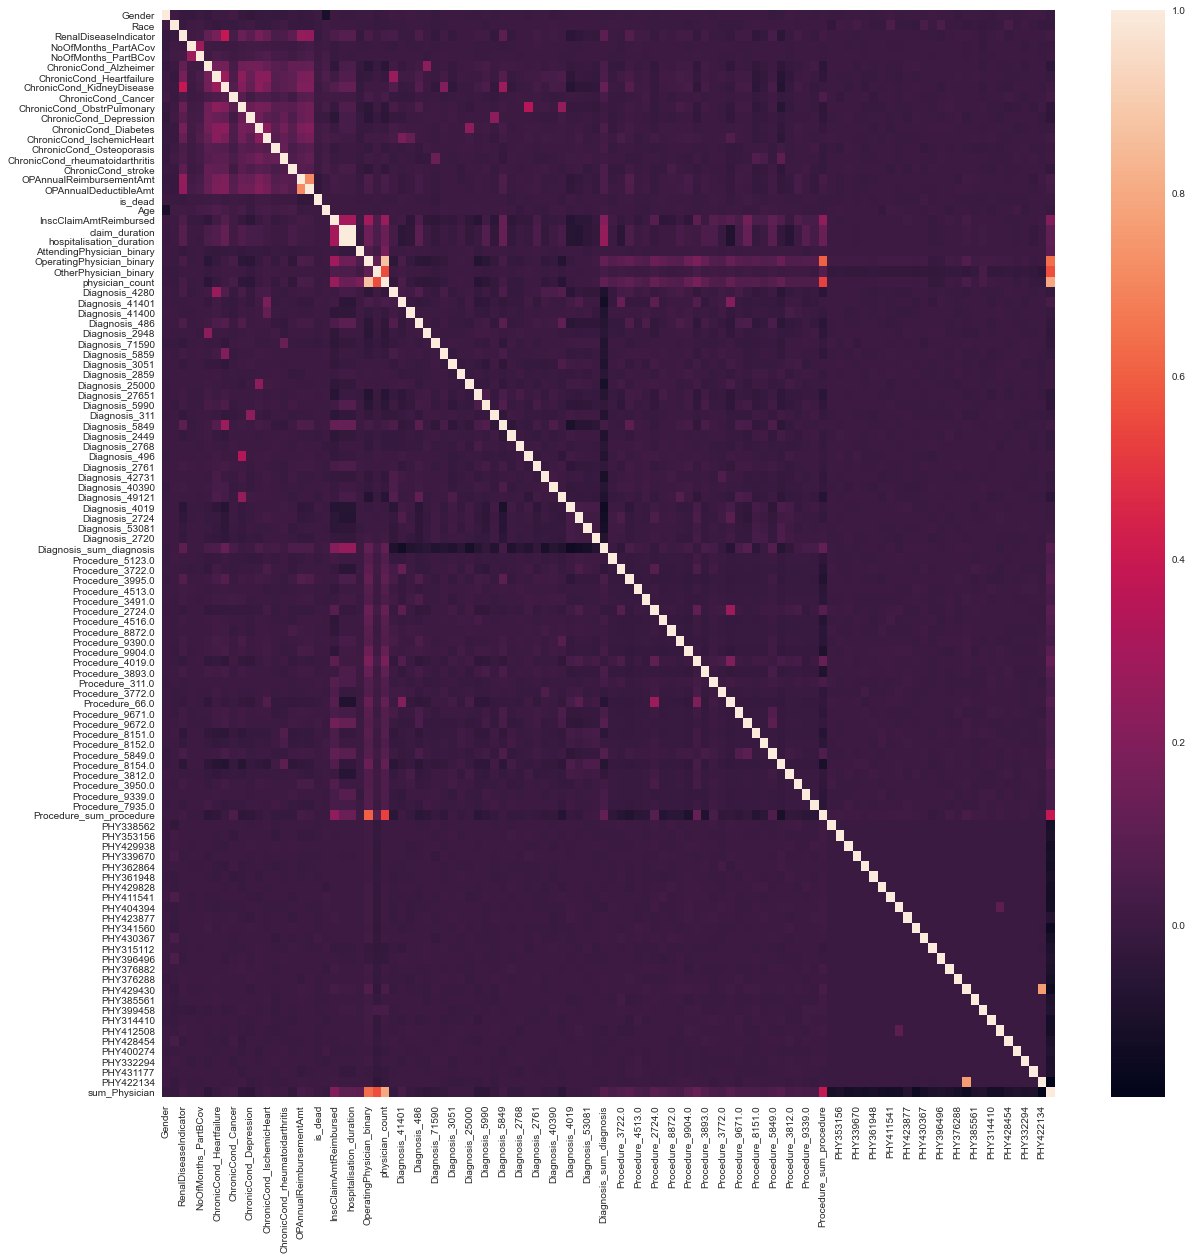

In [17]:
plt.figure(figsize = (20,20))
sns.heatmap(beneficiary_inpatient_1.corr())

## Hopkins Statistics:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H
hopkins(beneficiary_inpatient_1)

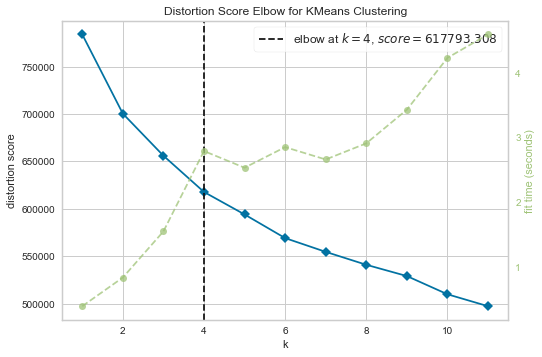

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:

beneficiary_outpatient_flagged
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(beneficiary_inpatient_1)
visualizer.show()

# silhouette analysis
range_n_clusters = [2,3,4,5,6,7]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(beneficiary_inpatient_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(beneficiary_inpatient_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2 The average silhouette_score is : 0.11083846113482951
For n_clusters = 3 The average silhouette_score is : 0.10120736840416335
For n_clusters = 4 The average silhouette_score is : 0.10507926717326192
For n_clusters = 5 The average silhouette_score is : 0.0860909255422464
For n_clusters = 6 The average silhouette_score is : 0.10315126290027053
For n_clusters = 7 The average silhouette_score is : 0.08215878498350225


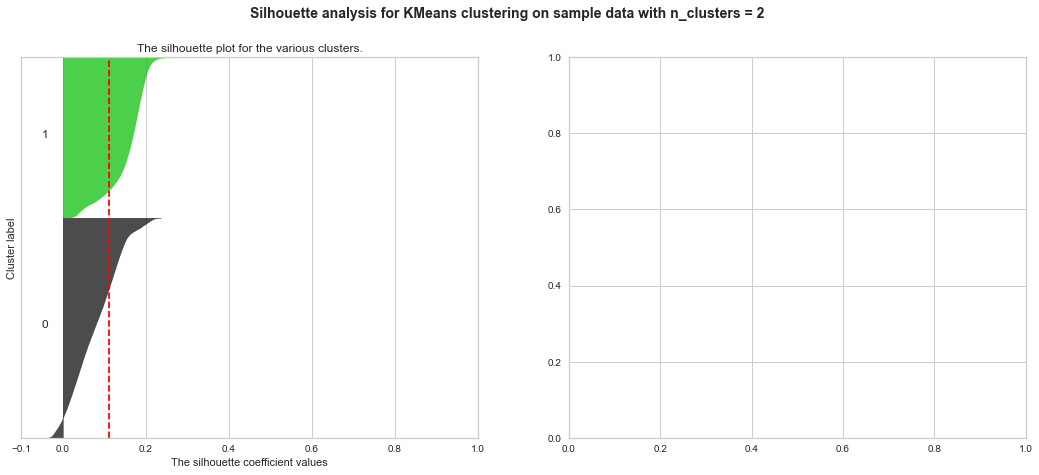

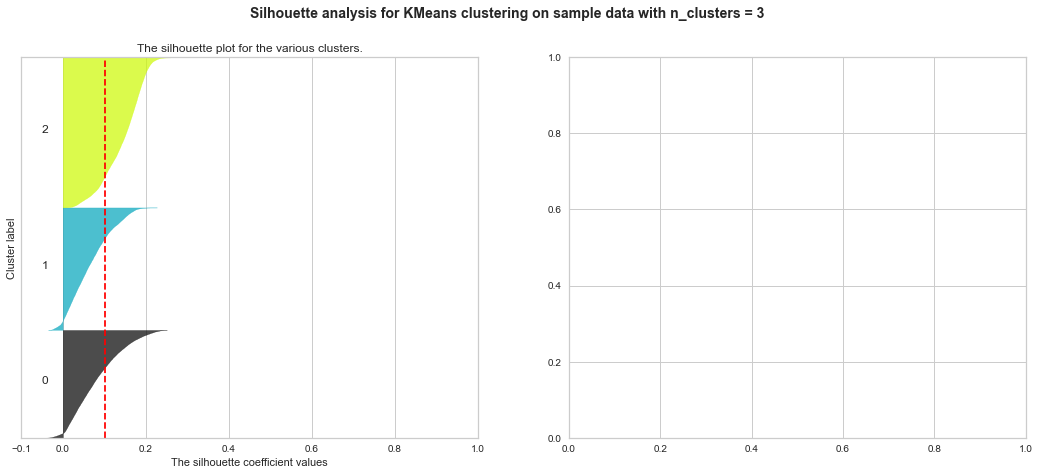

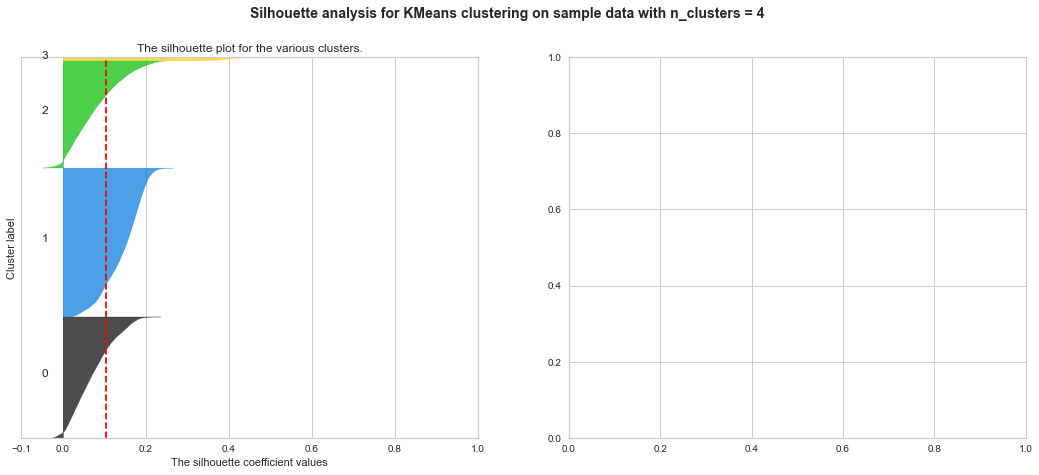

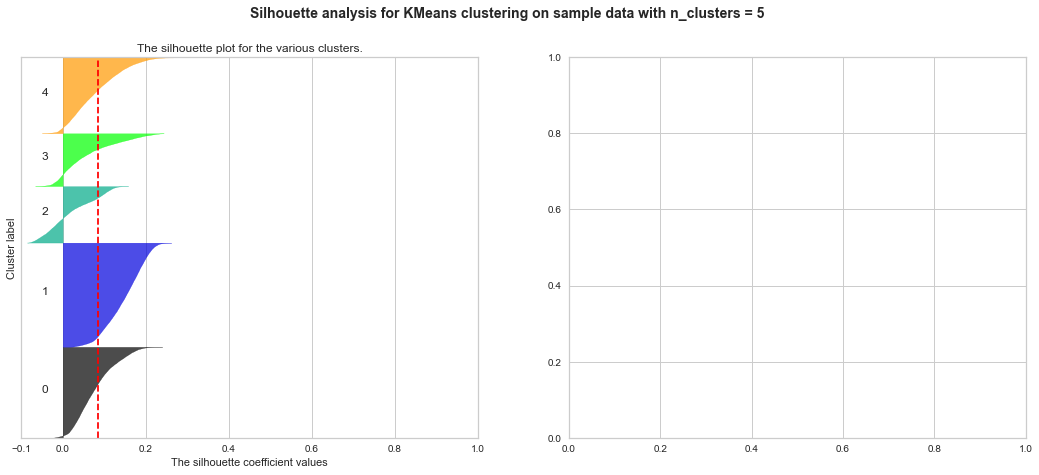

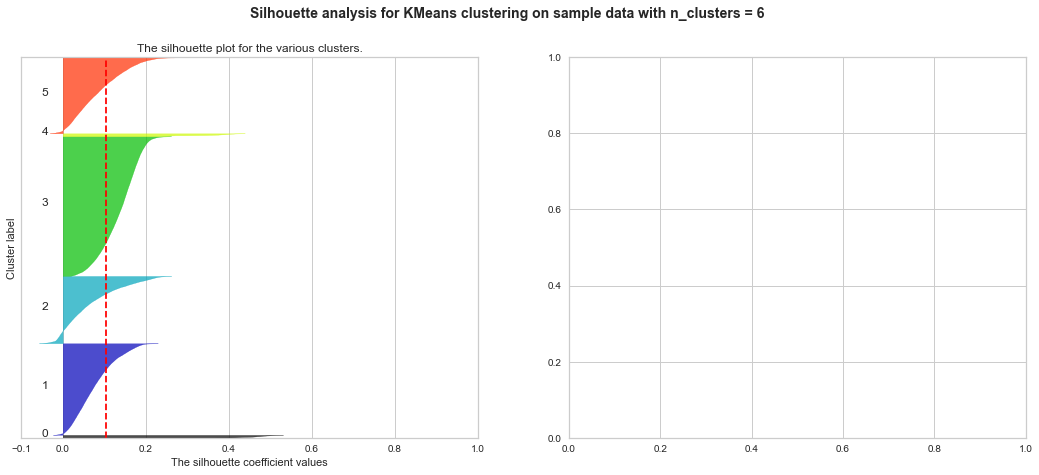

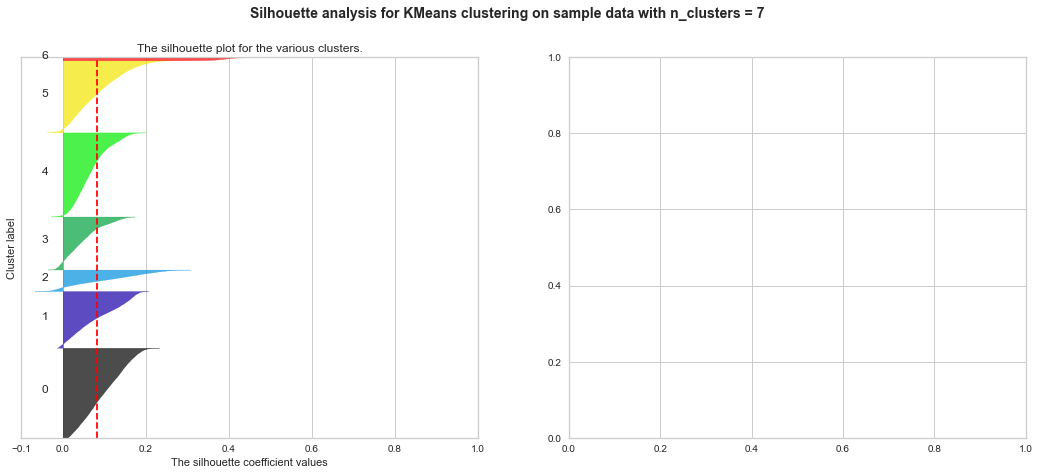

In [29]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(beneficiary_inpatient_1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(beneficiary_inpatient_1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(beneficiary_inpatient_1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(beneficiary_inpatient_1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [30]:
beneficiary_outpatient_flagged.head()

,PotentialFraud,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age,InscClaimAmtReimbursed,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,other_ClmDiagnosisCode_sum,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,all_ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM733300,No,1,1,1,1,660,0.092163,0.109916,1,1,1,1,0,0,1,1,0,0,0,-0.382538,-0.418175,-0.460385,-0.182325,0,0.453132,-0.880359,-0.376620,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.550047,1,1,0,0,0,0,0,0,0,0,-0.039876
CLM372475,No,1,1,0,1,440,0.092163,0.109916,1,0,0,0,0,0,1,1,1,0,1,-0.382538,-0.418175,0.027201,-1.190081,0,-0.638783,1.336100,2.438614,1,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.362686,1,1,1,1,1,1,0,0,0,0,1.515736
CLM748221,No,0,1,0,1,660,0.092163,0.109916,0,0,1,0,0,0,1,1,0,1,0,-0.382538,-0.418175,0.495793,0.545629,0,0.091859,1.506492,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM272936,No,1,1,0,1,410,0.092163,0.109916,1,1,1,1,1,1,1,1,0,0,0,-0.171430,0.698779,2.172314,2.167944,0,-0.080281,1.110638,2.438614,1,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.701433,1,1,1,1,1,1,0,0,0,0,1.515736
CLM452024,No,1,1,0,1,510,0.092163,0.109916,1,1,0,0,0,0,0,1,1,0,0,0.140005,0.698779,-0.356432,-0.412684,0,1.565478,-0.144456,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210


In [31]:
#clustring with 5 clusters
#kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
#clusters = kmeans.fit_predict(beneficiary_outpatient_flagged.drop(["PotentialFraud","State","County"],axis=1))

In [32]:
#clustring with 5 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(beneficiary_inpatient_1)

In [33]:
beneficiary_inpatient_1.insert(0, "Cluster", clusters, True)
beneficiary_inpatient_1.head()

,Cluster,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age,InscClaimAmtReimbursed,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_4280,Diagnosis_41401,Diagnosis_41400,Diagnosis_486,Diagnosis_2948,Diagnosis_71590,Diagnosis_5859,Diagnosis_3051,Diagnosis_2859,Diagnosis_25000,Diagnosis_27651,Diagnosis_5990,Diagnosis_311,Diagnosis_5849,Diagnosis_2449,Diagnosis_2768,Diagnosis_496,Diagnosis_2761,Diagnosis_42731,Diagnosis_40390,Diagnosis_49121,Diagnosis_4019,Diagnosis_2724,Diagnosis_53081,Diagnosis_2720,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY338562,PHY353156,PHY429938,PHY339670,PHY362864,PHY361948,PHY429828,PHY411541,PHY404394,PHY423877,PHY341560,PHY430367,PHY315112,PHY396496,PHY376882,PHY376288,PHY429430,PHY385561,PHY399458,PHY314410,PHY412508,PHY428454,PHY400274,PHY332294,PHY431177,PHY422134,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,0,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,-1.052227,-0.412684,0,-0.638783,1.580334,0.495000,0.494369,1,0,0,-1.159907,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,-0.823387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
CLM66048,3,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,-1.052227,-0.412684,0,-0.638783,-0.428070,-0.805205,-0.805652,1,1,0,0.531912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.784958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM68358,3,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,-1.052227,-0.412684,0,-0.638783,-0.428070,-0.340828,-0.341280,1,0,1,0.531912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM38412,1,0,0,0,0.092163,0.109916,0,1,1,0,0,1,1,0,0,1,1,-0.544920,0.449339,0,2.129803,-0.428070,0.843234,0.842460,1,1,1,1.916048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.951322
CLM63689,1,0,1,1,0.092163,0.109916,0,1,1,0,1,1,0,1,0,0,0,-0.836680,-0.232619,0,-0.246804,0.282015,1.724239,1.722905,1,1,0,0.531912,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678


In [34]:
beneficiary_inpatient_1['Cluster'].value_counts()

0    15085
3     9826
1     8202
2     7361
Name: Cluster, dtype: int64

In [35]:
beneficiary_inpatient_1.head()

,Cluster,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age,InscClaimAmtReimbursed,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_4280,Diagnosis_41401,Diagnosis_41400,Diagnosis_486,Diagnosis_2948,Diagnosis_71590,Diagnosis_5859,Diagnosis_3051,Diagnosis_2859,Diagnosis_25000,Diagnosis_27651,Diagnosis_5990,Diagnosis_311,Diagnosis_5849,Diagnosis_2449,Diagnosis_2768,Diagnosis_496,Diagnosis_2761,Diagnosis_42731,Diagnosis_40390,Diagnosis_49121,Diagnosis_4019,Diagnosis_2724,Diagnosis_53081,Diagnosis_2720,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY338562,PHY353156,PHY429938,PHY339670,PHY362864,PHY361948,PHY429828,PHY411541,PHY404394,PHY423877,PHY341560,PHY430367,PHY315112,PHY396496,PHY376882,PHY376288,PHY429430,PHY385561,PHY399458,PHY314410,PHY412508,PHY428454,PHY400274,PHY332294,PHY431177,PHY422134,sum_Physician
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,0,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,-1.052227,-0.412684,0,-0.638783,1.580334,0.495000,0.494369,1,0,0,-1.159907,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,-0.823387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
CLM66048,3,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,-1.052227,-0.412684,0,-0.638783,-0.428070,-0.805205,-0.805652,1,1,0,0.531912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.784958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM68358,3,1,1,0,0.092163,0.109916,1,0,1,0,0,1,1,1,0,1,1,-1.052227,-0.412684,0,-0.638783,-0.428070,-0.340828,-0.341280,1,0,1,0.531912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678
CLM38412,1,0,0,0,0.092163,0.109916,0,1,1,0,0,1,1,0,0,1,1,-0.544920,0.449339,0,2.129803,-0.428070,0.843234,0.842460,1,1,1,1.916048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.338297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.951322
CLM63689,1,0,1,1,0.092163,0.109916,0,1,1,0,1,1,0,1,0,0,0,-0.836680,-0.232619,0,-0.246804,0.282015,1.724239,1.722905,1,1,0,0.531912,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567678


In [36]:
inpatient_cluster_0 = beneficiary_inpatient_1[beneficiary_inpatient_1['Cluster']==0]
inpatient_cluster_0.reset_index(drop=False,inplace=True)
inpatient_cluster_1 = beneficiary_inpatient_1[beneficiary_inpatient_1['Cluster']==1]
inpatient_cluster_1.reset_index(drop=False,inplace=True)
inpatient_cluster_2 = beneficiary_inpatient_1[beneficiary_inpatient_1['Cluster']==2]
inpatient_cluster_2.reset_index(drop=False,inplace=True)
inpatient_cluster_3 = beneficiary_inpatient_1[beneficiary_inpatient_1['Cluster']==3]
inpatient_cluster_3.reset_index(drop=False,inplace=True)
# inpatient_cluster_4 = beneficiary_inpatient_1[beneficiary_inpatient_1['Cluster']==4]
# inpatient_cluster_4.reset_index(drop=False,inplace=True)

In [37]:
inpatient_claimID_flagged = pd.read_csv("inpatient_claimID_flagged.csv")

In [38]:
beneficiary_inpatient_1.reset_index(drop=False)
inpatient_full_falgged = inpatient_claimID_flagged.merge(beneficiary_inpatient_1, on="ClaimID",how="inner")
inpatient_cluster_0_falgged = inpatient_claimID_flagged.merge(inpatient_cluster_0, on="ClaimID",how="inner")
inpatient_cluster_1_falgged = inpatient_claimID_flagged.merge(inpatient_cluster_1, on="ClaimID",how="inner")
inpatient_cluster_2_falgged = inpatient_claimID_flagged.merge(inpatient_cluster_2, on="ClaimID",how="inner")
inpatient_cluster_3_falgged = inpatient_claimID_flagged.merge(inpatient_cluster_3, on="ClaimID",how="inner")
# inpatient_cluster_4_falgged = inpatient_claimID_flagged.merge(inpatient_cluster_4, on="ClaimID",how="inner")

In [39]:
inpatient_full_falgged.to_csv("inpatient_full_falgged.csv")

In [43]:
inpatient_cluster_0_falgged.head()

,ClaimID,PotentialFraud,Cluster,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,is_dead,Age,InscClaimAmtReimbursed,claim_duration,hospitalisation_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,Diagnosis_4280,Diagnosis_41401,Diagnosis_41400,Diagnosis_486,Diagnosis_2948,Diagnosis_71590,Diagnosis_5859,Diagnosis_3051,Diagnosis_2859,Diagnosis_25000,Diagnosis_27651,Diagnosis_5990,Diagnosis_311,Diagnosis_5849,Diagnosis_2449,Diagnosis_2768,Diagnosis_496,Diagnosis_2761,Diagnosis_42731,Diagnosis_40390,Diagnosis_49121,Diagnosis_4019,Diagnosis_2724,Diagnosis_53081,Diagnosis_2720,Diagnosis_sum_diagnosis,Procedure_5123.0,Procedure_3722.0,Procedure_3995.0,Procedure_4513.0,Procedure_3491.0,Procedure_2724.0,Procedure_4516.0,Procedure_8872.0,Procedure_9390.0,Procedure_9904.0,Procedure_4019.0,Procedure_3893.0,Procedure_311.0,Procedure_3772.0,Procedure_66.0,Procedure_9671.0,Procedure_9672.0,Procedure_8151.0,Procedure_8152.0,Procedure_5849.0,Procedure_8154.0,Procedure_3812.0,Procedure_3950.0,Procedure_9339.0,Procedure_7935.0,Procedure_sum_procedure,PHY338562,PHY353156,PHY429938,PHY339670,PHY362864,PHY361948,PHY429828,PHY411541,PHY404394,PHY423877,PHY341560,PHY430367,PHY315112,PHY396496,PHY376882,PHY376288,PHY429430,PHY385561,PHY399458,PHY314410,PHY412508,PHY428454,PHY400274,PHY332294,PHY431177,PHY422134,sum_Physician
0,CLM58316,No,0,1,1,0,0.092163,0.109916,0,1,1,0,0,1,1,1,0,0,1,1.380014,-0.050814,0,-0.486139,2.127975,0.002810,0.002311,1,0,0,-1.159907,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
1,CLM52334,No,0,1,1,0,0.092163,0.109916,0,0,1,0,0,0,0,0,0,0,0,0.930836,1.196657,0,-0.246804,0.498310,-0.805205,-0.805652,1,0,0,-1.159907,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.292783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
2,CLM36844,No,0,0,1,0,0.092163,0.109916,1,1,0,0,0,1,1,1,0,1,0,-1.673308,-1.862071,0,0.005085,-0.854027,0.273290,0.272728,1,0,0,-1.159907,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.292783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
3,CLM39293,Yes,0,0,0,1,0.092163,0.109916,1,0,1,0,0,1,1,1,1,1,0,-0.641483,-0.571207,0,-1.821282,-0.428070,-0.340828,-0.341280,1,0,0,-1.159907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.848517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446
4,CLM31530,Yes,0,0,1,1,0.092163,0.109916,1,1,1,0,0,0,1,1,0,0,0,0.079436,0.092928,0,0.936947,-0.623273,1.582350,1.581127,1,0,0,-1.159907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.292783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.726526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.732446


## Defining a function to display bar charts of the respective codes

In [128]:
def plot_codes(df):
    
    ChronicCond = [i for i in df.columns if "ChronicCond" in i]
    Diagnosis_ = [i for i in df.columns if "Diagnosis_" in i]
    Procedure_ = [i for i in df.columns if "Procedure_" in i]
    PHY = [i for i in df.columns if "PHY" in i]
    
    
    ## CREATING DATAFRAMES FOR EACH CODE AND THEIR OCCURANCES
    # Chronic Condition
    df_ChronicCond = pd.DataFrame(df[ChronicCond].sum(axis=0).sort_values(ascending=False)).reset_index()
    df_ChronicCond.rename(columns = {"index":"ChronicCond",
                                     0:"Count"}, inplace = True)

    # Diagnosis Codes
    df_Diagnosis_ = pd.DataFrame(df[Diagnosis_].sum(axis=0).sort_values(ascending=False)).reset_index()
    df_Diagnosis_.rename(columns = {"index":"Diagnosis_",
                                     0:"Count"}, inplace = True)

    # Procedure Codes
    df_Procedure_ = pd.DataFrame(df[Procedure_].sum(axis=0).sort_values(ascending=False)).reset_index()
    df_Procedure_.rename(columns = {"index":"Procedure_",
                                     0:"Count"}, inplace = True)

    # Physicians
    df_PHY = pd.DataFrame(df[PHY].sum(axis=0).sort_values(ascending=False)).reset_index()
    df_PHY.rename(columns = {"index":"PHY",
                                     0:"Count"}, inplace = True)

    ## PLOTTING THE GRAPHS
    plt.figure(figsize=(18,10))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.subplot(2,2,1)
    plt.bar(x = df_ChronicCond["ChronicCond"], height = df_ChronicCond["Count"])
    plt.xticks(rotation=90)
   
    plt.subplot(2,2,2)
    plt.bar(x = df_Diagnosis_["Diagnosis_"], height = df_Diagnosis_["Count"])
    plt.xticks(rotation=90)

    plt.subplot(2,2,3)
    plt.bar(x = df_Procedure_["Procedure_"], height = df_Procedure_["Count"])
    plt.xticks(rotation=90)

    plt.subplot(2,2,4)
    plt.bar(x = df_PHY["PHY"], height = df_PHY["Count"])
    plt.xticks(rotation=90)
    

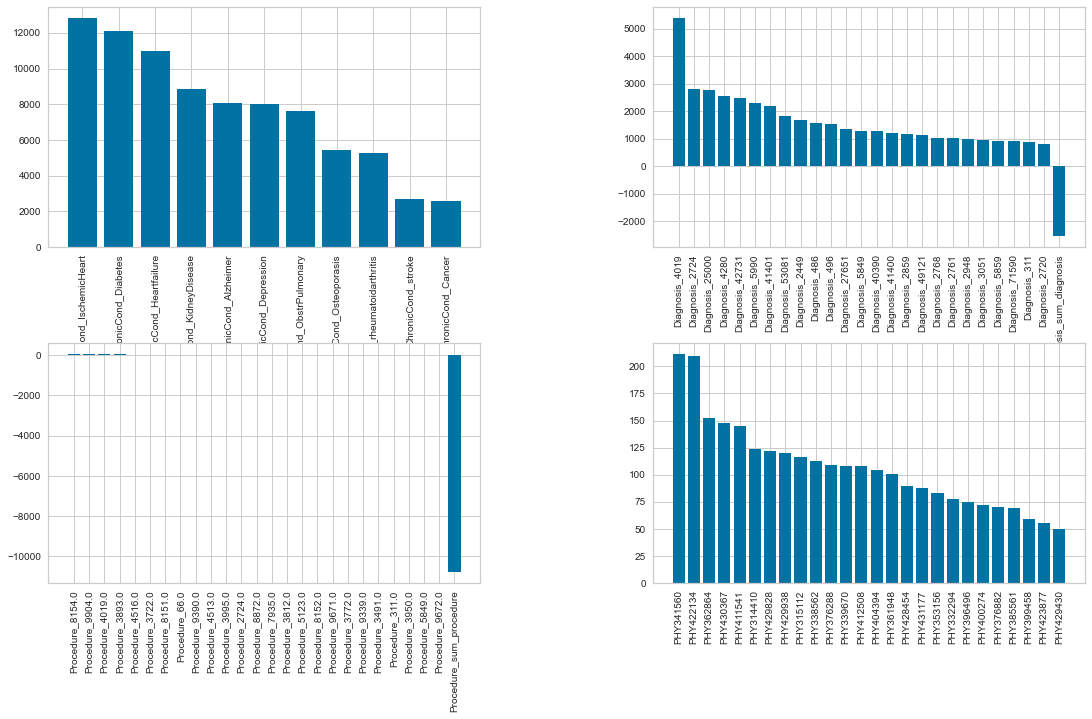

In [129]:
plot_codes(inpatient_cluster_0_falgged)

**_Inference_**: CLUSTER 0
1. 

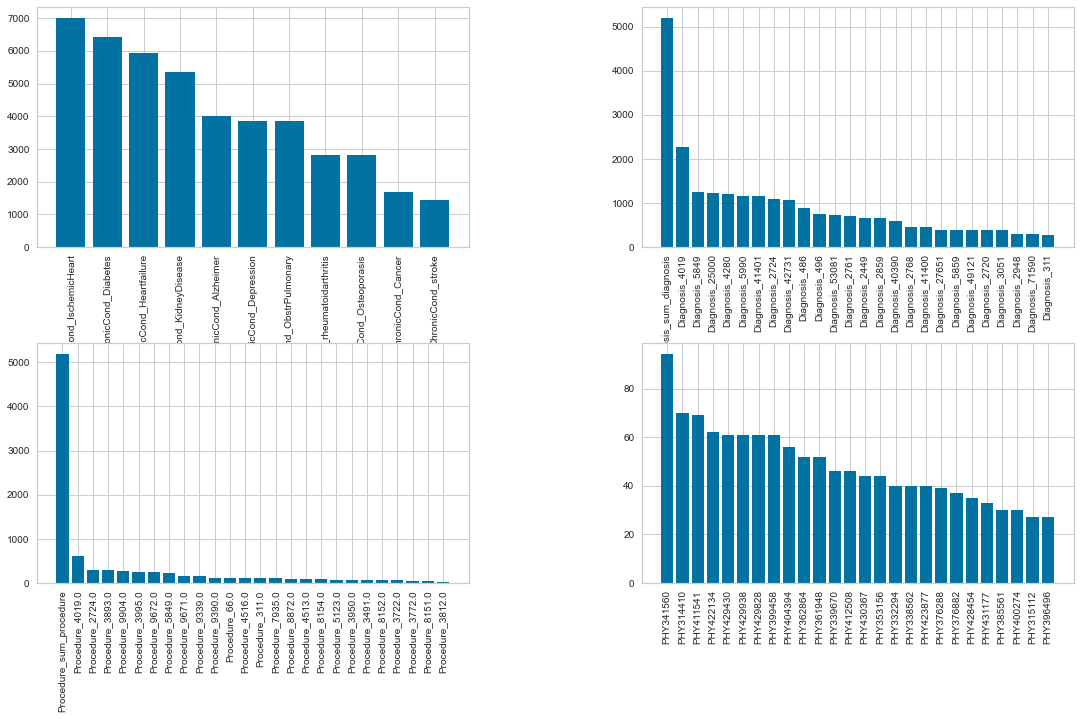

In [132]:
plot_codes(inpatient_cluster_1_falgged)

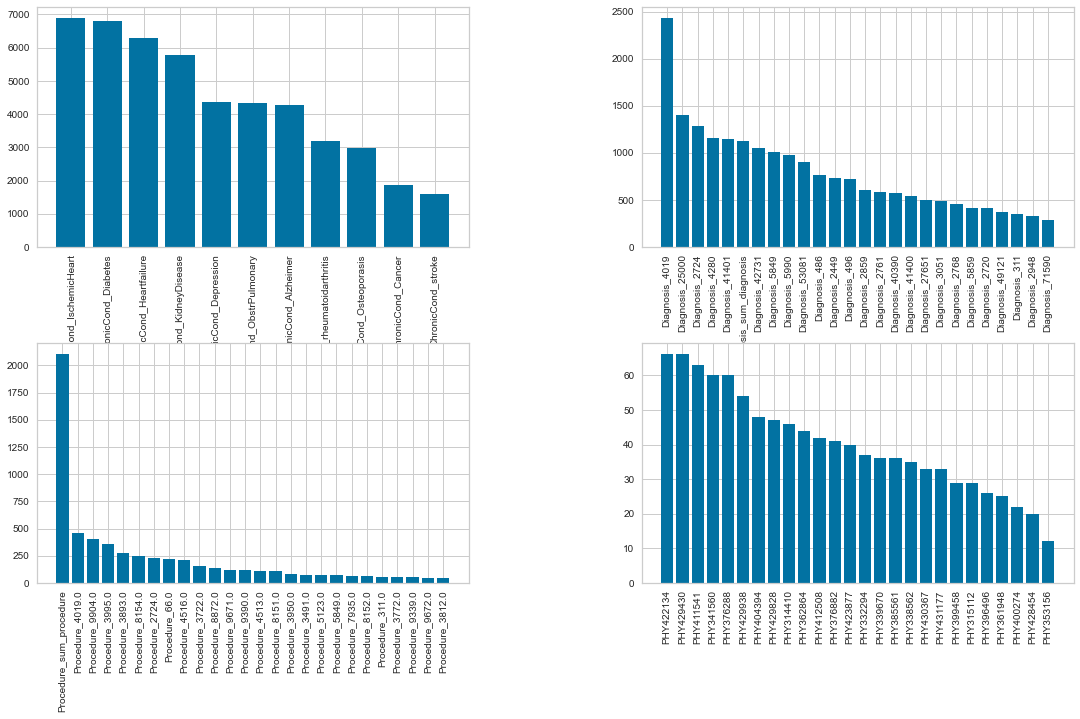

In [133]:
plot_codes(inpatient_cluster_2_falgged)

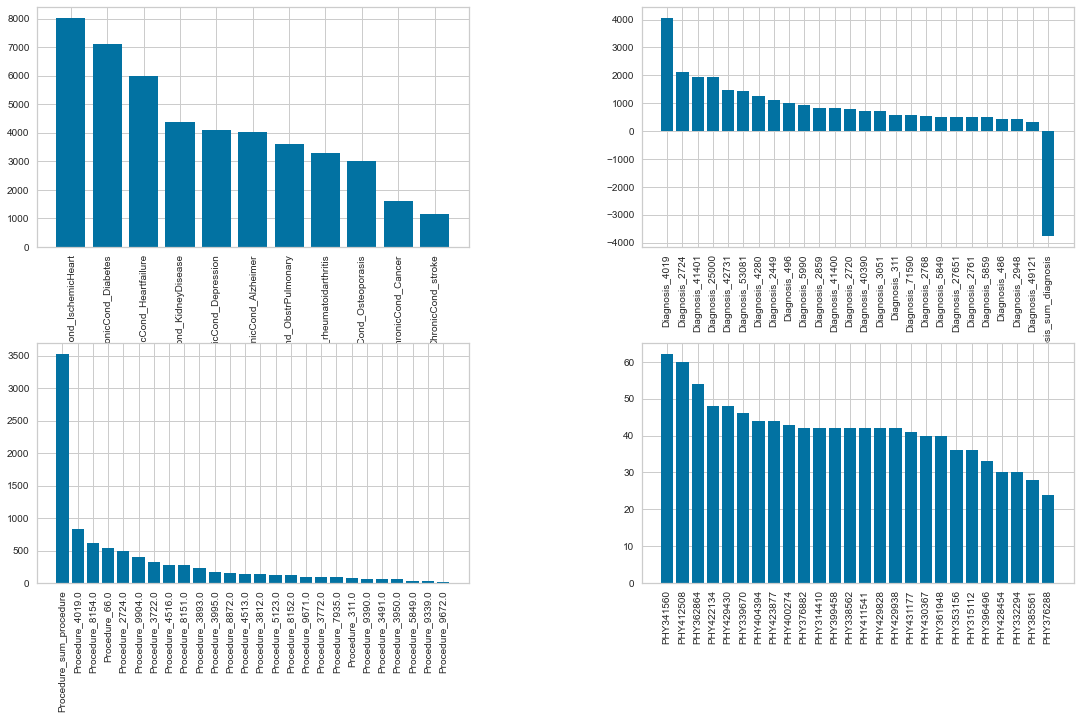

In [134]:
plot_codes(inpatient_cluster_3_falgged)

In [ ]:
inpatient_full_falgged["PotentialFraud"].value_counts()*100/len(inpatient_full_falgged)

In [ ]:
inpatient_cluster_0_falgged["PotentialFraud"].value_counts()*100/len(inpatient_cluster_0_falgged)

In [ ]:
inpatient_cluster_1_falgged["PotentialFraud"].value_counts()*100/len(inpatient_cluster_1_falgged)

In [ ]:
inpatient_cluster_2_falgged["PotentialFraud"].value_counts()*100/len(inpatient_cluster_2_falgged)

In [ ]:
inpatient_cluster_3_falgged["PotentialFraud"].value_counts()*100/len(inpatient_cluster_3_falgged)

In [ ]:
inpatient_cluster_4_falgged["PotentialFraud"].value_counts()*100/len(inpatient_cluster_4_falgged)